In [2]:
pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16105 sha256=ce406483998e3baac8432f0d5b31c461406e535a78247512ca6c6f9257fe0086
  Stored in directory: c:\users\cherukuri\appdata\local\pip\cache\wheels\e8\78\c8\18d4f4804753e14416809b365773220c48b41fe5387f2bb6b9
Successfully built pytrends
Note: you may need to restart the kernel to use updated packages.


In [1]:
#request connection to google trends
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US')

In [2]:
#specify the keywords we want to find if they are trending
all_keywords = ['Fidget spinner', 'Food', 'Cycle', 
                'Shirt', 'Wine', 'Beer']
keywords = []

In [3]:
#timeframes
timeframes = ['today 5-y', 'today 12-m', 
              'today 3-m', 'today 1-m']
cat = '0'
geo = ''
gprop = ''

In [4]:
#this prints the raw data
def check_data():
    pytrends.build_payload(keywords,
                           cat, 
                           timeframes[0],
                           geo,
                           gprop) 
    data = pytrends.interest_over_time()
    print(data)

In [5]:
for kw in all_keywords:
    keywords.append(kw)
    check_data()
    keywords.pop()

            Fidget spinner  isPartial
date                                 
2017-08-06             100      False
2017-08-13              82      False
2017-08-20              68      False
2017-08-27              57      False
2017-09-03              50      False
...                    ...        ...
2022-06-26               3      False
2022-07-03               2      False
2022-07-10               3      False
2022-07-17               3      False
2022-07-24               3       True

[260 rows x 2 columns]
            Food  isPartial
date                       
2017-08-06    80      False
2017-08-13    80      False
2017-08-20    78      False
2017-08-27    79      False
2017-09-03    80      False
...          ...        ...
2022-06-26    97      False
2022-07-03    99      False
2022-07-10    98      False
2022-07-17    98      False
2022-07-24    98       True

[260 rows x 2 columns]
            Cycle  isPartial
date                        
2017-08-06     66      False
2017-08

In [6]:
#this prints the mean of the key words
def check_mean():
    pytrends.build_payload(keywords,
                           cat, 
                           timeframes[0],
                           geo,
                           gprop) 
    data = pytrends.interest_over_time()
    mean = round(data.mean(), 2)
    print(kw + ': ' + str(mean[kw]))

In [7]:
for kw in all_keywords:
    keywords.append(kw)
    check_mean()
    keywords.pop()

Fidget spinner: 7.33
Food: 88.51
Cycle: 79.19
Shirt: 76.96
Wine: 61.91
Beer: 82.13


In [8]:
#here we print the average 5 year interests of the key words and compare this with the previous year
def check_average_interest():
    pytrends.build_payload(keywords,
                           cat, 
                           timeframes[0],
                           geo,
                           gprop) 
    data = pytrends.interest_over_time()
    mean = round(data.mean(), 2)
    avg = round(data[kw][-52:].mean(), 2) 
    #last year 
    trend = round((avg/mean[kw]-1)*100, 2) 
    #, 2 is for two decimals
    print(kw)
    print('The average 5 years interest of ' + kw + 
          ' was ' + str(mean[kw]) + '.')
    print('The last year interest of ' + kw + 
          ' compared to the last 5 years' + 
          ' has changed by ' + str(trend) + '%.')

In [9]:
for kw in all_keywords:
    keywords.append(kw)
    check_average_interest()
    keywords.pop()

Fidget spinner
The average 5 years interest of Fidget spinner was 7.33.
The last year interest of Fidget spinner compared to the last 5 years has changed by -49.11%.
Food
The average 5 years interest of Food was 88.51.
The last year interest of Food compared to the last 5 years has changed by 7.16%.
Cycle
The average 5 years interest of Cycle was 79.19.
The last year interest of Cycle compared to the last 5 years has changed by 4.18%.
Shirt
The average 5 years interest of Shirt was 76.96.
The last year interest of Shirt compared to the last 5 years has changed by 7.98%.
Wine
The average 5 years interest of Wine was 61.91.
The last year interest of Wine compared to the last 5 years has changed by -4.2%.
Beer
The average 5 years interest of Beer was 82.13.
The last year interest of Beer compared to the last 5 years has changed by -10.2%.


In [10]:
#this we categorised the result and split them into different parameters
def check_average_interest_2():
    pytrends.build_payload(keywords,
                           cat, 
                           timeframes[0],
                           geo,
                           gprop) 
    data = pytrends.interest_over_time()
    mean = round(data.mean(), 2)
    avg = round(data[kw][-52:].mean(), 2) 
    #last year average
    trend = round(((avg/mean[kw])-1)*100, 2) 
    #, 2 is for two decimals
    print(kw)
    print('The average 5 years interest of ' + kw + 
          ' was ' + str(mean[kw]) + '.')
    print('The last year interest of ' + kw + 
          ' compared to the last 5 years' + 
          ' has changed by ' + str(trend) + '%.')
    
    #Stable trend
    if mean[kw] > 75 and abs(trend) <= 5:
        print('The interest for ' + kw + ' is stable in the last 5 years.')
    elif mean[kw] > 75 and trend > 5:
        print('The interest for ' + kw + ' is stable and increasing in the last 5 years.')
    elif mean[kw] > 75 and trend < -5:
        print('The interest for ' + kw + ' is stable and decreasing in the last 5 years.')

    #Relatively stable
    elif mean[kw] > 60 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is relatively stable in the last 5 years.')
    elif mean[kw] > 60 and trend > 15:
        print('The interest for ' + kw + ' is relatively stable and increasing in the last 5 years.')
    elif mean[kw] > 60 and trend < -15:
        print('The interest for ' + kw + ' is relatively stable and decreasing in the last 5 years.')

    #Seasonal
    elif mean[kw] > 20 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is seasonal.')

    #New keyword
    elif mean[kw] > 20 and trend > 15:
        print('The interest for ' + kw + ' is trending.')

    #Declining keyword
    elif mean[kw] > 20 and trend < -15:
        print('The interest for ' + kw + ' is significantly decreasing.')

    #Cyclinal
    elif mean[kw] > 5 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is cyclical.')

    #New
    elif mean[kw] > 0 and trend > 15:
        print('The interest for ' + kw + ' is new and trending.')

    #Declining
    elif mean[kw] > 0 and trend < -15:
        print('The interest for ' + kw + ' is declining and not comparable to its peak.')

    #Other
    else:
        print('This is something to be checked.')
        
    print('')

In [11]:
for kw in all_keywords:
    keywords.append(kw)
    check_average_interest_2()
    keywords.pop()

Fidget spinner
The average 5 years interest of Fidget spinner was 7.33.
The last year interest of Fidget spinner compared to the last 5 years has changed by -49.11%.
The interest for Fidget spinner is declining and not comparable to its peak.

Food
The average 5 years interest of Food was 88.51.
The last year interest of Food compared to the last 5 years has changed by 7.16%.
The interest for Food is stable and increasing in the last 5 years.

Cycle
The average 5 years interest of Cycle was 79.19.
The last year interest of Cycle compared to the last 5 years has changed by 4.18%.
The interest for Cycle is stable in the last 5 years.

Shirt
The average 5 years interest of Shirt was 76.96.
The last year interest of Shirt compared to the last 5 years has changed by 7.98%.
The interest for Shirt is stable and increasing in the last 5 years.

Wine
The average 5 years interest of Wine was 61.91.
The last year interest of Wine compared to the last 5 years has changed by -4.2%.
The interest for

In [12]:
#here we calculate the percentage of change in interests
def check_average_interest_3():
    pytrends.build_payload(keywords,
                           cat, 
                           timeframes[0],
                           geo,
                           gprop) 
    data = pytrends.interest_over_time()
    mean = round(data.mean(), 2)
    avg = round(data[kw][-52:].mean(), 2) 
    #last year average
    avg2 = round(data[kw][52:].mean(), 2)
    #yearly average of 5 years ago
    trend = round(((avg/mean[kw])-1)*100, 2) 
    #, 2 is for two decimals
    trend2 = round(((avg/avg2)-1)*100, 2)
    print(kw)
    print('The average 5 years interest of ' + kw + 
          ' was ' + str(mean[kw]) + '.')
    print('The last year interest of ' + kw + 
          ' compared to the last 5 years' + 
          ' has changed by ' + str(trend) + '%.')
    
    #Stable trend
    if mean[kw] > 75 and abs(trend) <= 5:
        print('The interest for ' + kw + ' is stable in the last 5 years.')
    elif mean[kw] > 75 and trend > 5:
        print('The interest for ' + kw + ' is stable and increasing in the last 5 years.')
    elif mean[kw] > 75 and trend < -5:
        print('The interest for ' + kw + ' is stable and decreasing in the last 5 years.')

    #Relatively stable
    elif mean[kw] > 60 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is relatively stable in the last 5 years.')
    elif mean[kw] > 60 and trend > 15:
        print('The interest for ' + kw + ' is relatively stable and increasing in the last 5 years.')
    elif mean[kw] > 60 and trend < -15:
        print('The interest for ' + kw + ' is relatively stable and decreasing in the last 5 years.')

    #Seasonal
    elif mean[kw] > 20 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is seasonal.')

    #New keyword
    elif mean[kw] > 20 and trend > 15:
        print('The interest for ' + kw + ' is trending.')

    #Declining keyword
    elif mean[kw] > 20 and trend < -15:
        print('The interest for ' + kw + ' is significantly decreasing.')

    #Cyclinal
    elif mean[kw] > 5 and abs(trend) <= 15:
        print('The interest for ' + kw + ' is cyclical.')

    #New
    elif mean[kw] > 0 and trend > 15:
        print('The interest for ' + kw + ' is new and trending.')

    #Declining
    elif mean[kw] > 0 and trend < -15:
        print('The interest for ' + kw + ' is declining and not comparable to its peak.')

    #Other
    else:
        print('This is something to be checked.')
        
    #Comparison last year vs. 5 years ago
    if avg2 == 0:
        print('This didn\'t exist 5 years ago.')
    elif trend2 > 15:
        print('The last year interest is quite higher compared to 5 years ago.'
              + ' It has increased by ' + str(trend2)+'%.')
    elif trend2 < -15:
        print('The last year interest is quite lower compared to 5 years ago.'
              + ' It has decreased by ' + str(trend2)+'%.')
    else:
        print('The last year interest is comparable to 5 years ago. '
              + ' It has changed by ' + str(trend2)+'%.')
    
    print('')

In [13]:
for kw in all_keywords:
    keywords.append(kw)
    check_average_interest_3()
    keywords.pop()

Fidget spinner
The average 5 years interest of Fidget spinner was 7.33.
The last year interest of Fidget spinner compared to the last 5 years has changed by -49.11%.
The interest for Fidget spinner is declining and not comparable to its peak.
The last year interest is comparable to 5 years ago.  It has changed by -9.69%.

Food
The average 5 years interest of Food was 88.51.
The last year interest of Food compared to the last 5 years has changed by 7.16%.
The interest for Food is stable and increasing in the last 5 years.
The last year interest is comparable to 5 years ago.  It has changed by 4.92%.

Cycle
The average 5 years interest of Cycle was 79.19.
The last year interest of Cycle compared to the last 5 years has changed by 4.18%.
The interest for Cycle is stable in the last 5 years.
The last year interest is comparable to 5 years ago.  It has changed by 3.28%.

Shirt
The average 5 years interest of Shirt was 76.96.
The last year interest of Shirt compared to the last 5 years has c

In [35]:
#here we plot the trend graph over a period of time
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import numpy as np
plot.style.use('ggplot')
pytrends = TrendReq(hl='en-US')

In [74]:
all_keywords = ['Car', 'Shoes', 'Stapler', 'Phone']
keywords = []

In [53]:
timeframes = ['today 5-y', 'today 12-m', 
              'today 3-m', 'today 1-m']
cat = '0'
geo = ''
gprop = ''

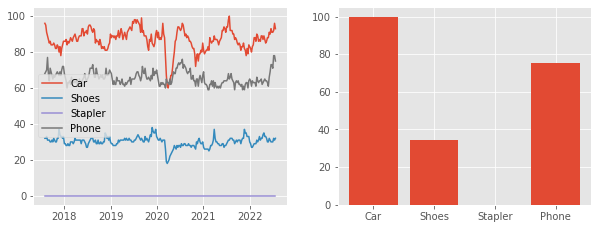

In [75]:
def comparision():
    plt.figure(figsize = (10, 8))
    xPosition = np.arange(len(all_keywords))
    
    #relative to last 5 years
    pytrends.build_payload(all_keywords,
                           cat, 
                           timeframes[0],
                           geo,
                           gprop)
    data = pytrends.interest_over_time()
    mean = data.mean()
    #this will make the highest interested product to 100 and make other products relative to it
    mean = round(mean / mean.max() * 100, 2)
    axis1 = plt.subplot2grid((2, 2), (0, 0), rowspan = 1, colspan = 1)
    axis2 = plt.subplot2grid((2, 2), (0, 1), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        axis1.plot(data[kw], label = kw)
    axis2.bar(xPosition, mean[0:len(all_keywords)], align = 'center')
    plot.xticks(xPosition, all_keywords)
    axis1.legend()
    plot.show()
comparision()

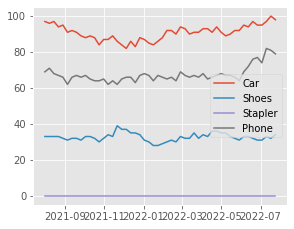

In [76]:
def comparision():
    plt.figure(figsize = (10, 8))
    
    #relative to last 12 months
    pytrends.build_payload(all_keywords,
                           cat, 
                           timeframes[1],
                           geo,
                           gprop)
    data = pytrends.interest_over_time()
    mean = data.mean()
    #this will make the highest interested product to 100 and make other products relative to it
    mean = round(mean / mean.max() * 100, 2)
    axis1 = plt.subplot2grid((2, 2), (0, 0), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        axis1.plot(data[kw], label = kw)
    axis1.legend()
    plot.show()
comparision()

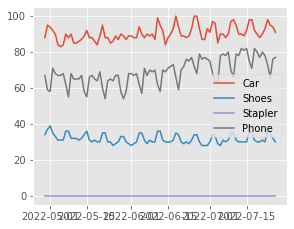

In [77]:
def comparision():
    plt.figure(figsize = (10, 8))
    
    #relative to last 3 months
    pytrends.build_payload(all_keywords,
                           cat, 
                           timeframes[2],
                           geo,
                           gprop)
    data = pytrends.interest_over_time()
    mean = data.mean()
    #this will make the highest interested product to 100 and make other products relative to it
    mean = round(mean / mean.max() * 100, 2)
    axis1 = plt.subplot2grid((2, 2), (0, 0), rowspan = 1, colspan = 1)
    for kw in all_keywords:
        axis1.plot(data[kw], label = kw)
    axis1.legend()
    plot.show()
comparision()